## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Load the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()
from scipy import stats
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
kc = pd.read_csv('kc_house_data.csv', 'r', delimiter=',')

#Checking that the import was successful.
kc.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [3]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Sub-Set the data
May not be necessary with less than 22,000 rows.  The last example lesson we did had 90,000 entries as a sub-set.  But, I will do this just in case.  Zipcodes seem like the most worthy canidate as a subgroup.

In [5]:
kc["zipcode"].value_counts().head(3)

98103    602
98038    589
98115    583
Name: zipcode, dtype: int64

In [6]:
kc = kc[kc["zipcode"] == 98103] 

In [7]:
print("The orginal dataset " + '21,597')
print("The sample dataset " + str(len(kc)))

The orginal dataset 21,597
The sample dataset 602


In [8]:
np.round(602/21597,2)
# sample = 74% of full dataset

0.03

In [9]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 17 to 21592
Data columns (total 21 columns):
id               602 non-null int64
date             602 non-null object
price            602 non-null float64
bedrooms         602 non-null int64
bathrooms        602 non-null float64
sqft_living      602 non-null int64
sqft_lot         602 non-null int64
floors           602 non-null float64
waterfront       540 non-null float64
view             601 non-null float64
condition        602 non-null int64
grade            602 non-null int64
sqft_above       602 non-null int64
sqft_basement    602 non-null object
yr_built         602 non-null int64
yr_renovated     480 non-null float64
zipcode          602 non-null int64
lat              602 non-null float64
long             602 non-null float64
sqft_living15    602 non-null int64
sqft_lot15       602 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 103.5+ KB


Let's deal with the datatypes and null values

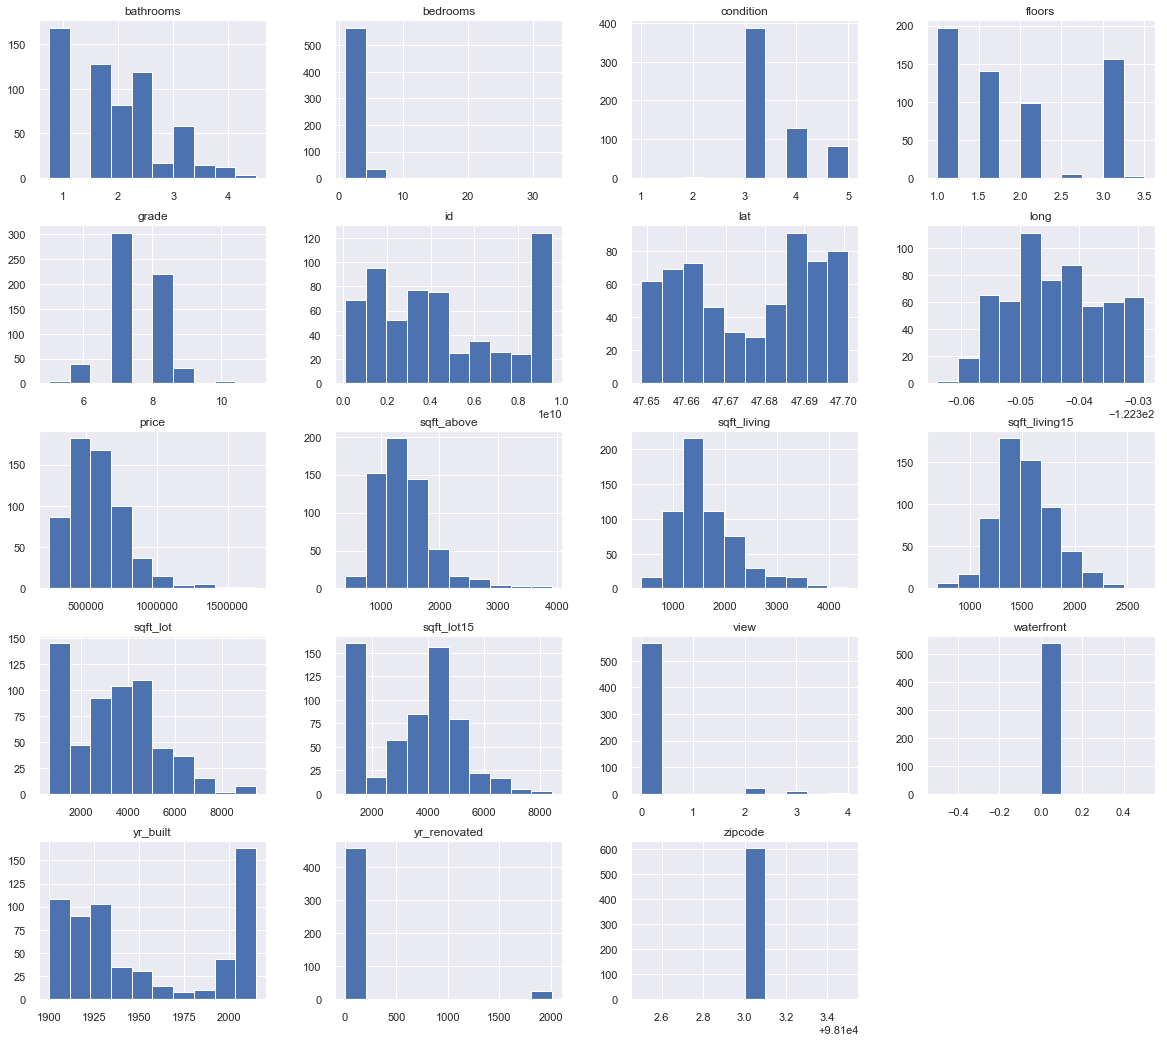

In [10]:
#Use pandas histogram plotting to plot histograms for all 
#the variables in the dataset

kc.hist(figsize=(20,18));

Use only the continuous variables for visualizing probability densities and KDE's

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


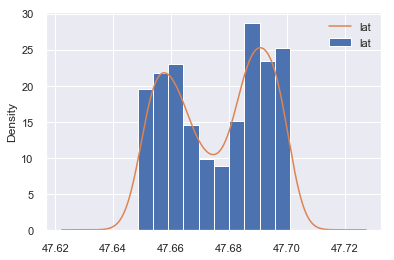

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


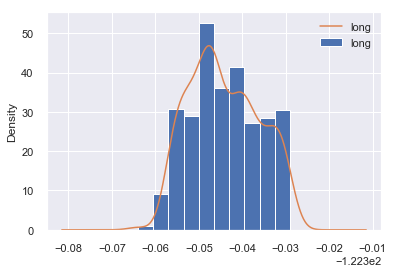

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


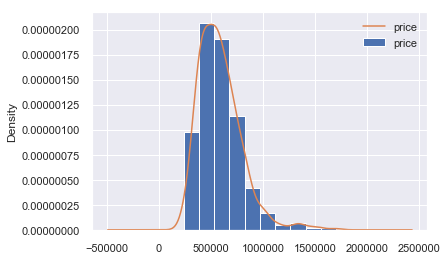

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


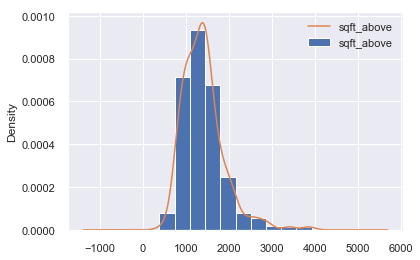

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


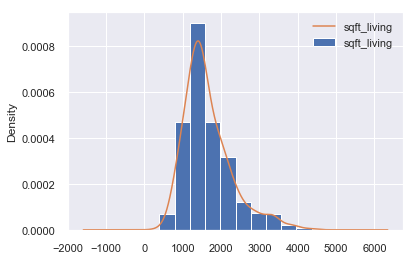

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


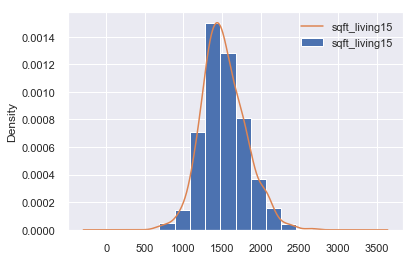

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


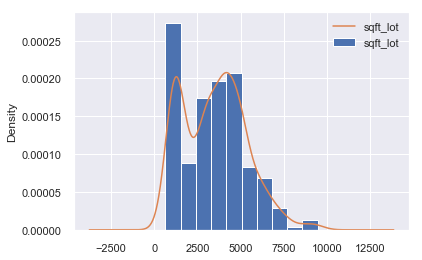

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


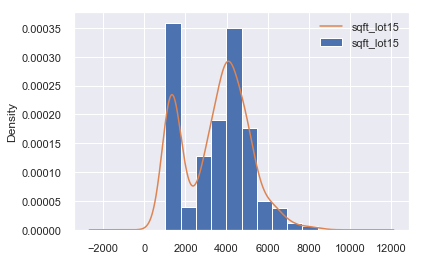

In [11]:
for column in ['lat',
               'long', 'price', "sqft_above", 'sqft_living',
              "sqft_living15", "sqft_lot", "sqft_lot15",
              ]:
    kc[column].plot.hist(normed=True)
    kc[column].plot.kde(label=column)
    plt.legend()
    plt.show()

Build joint plots to check for the linearity assumption between predictors and target variable.  I'm doing this before scrubbing to see if my efforts are going in the right direction.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


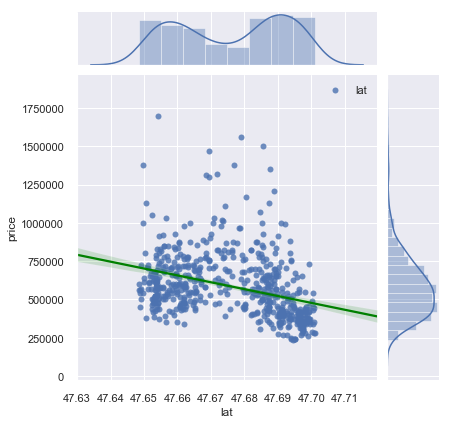

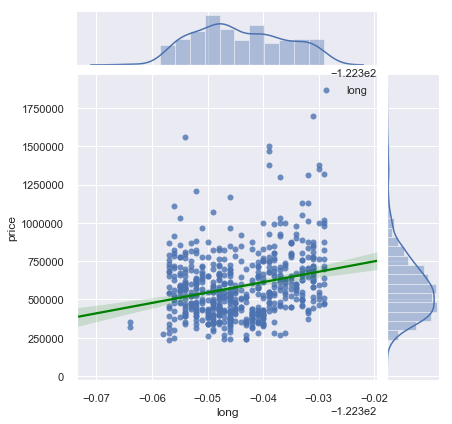

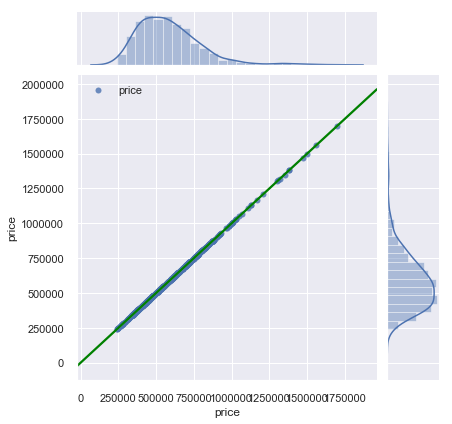

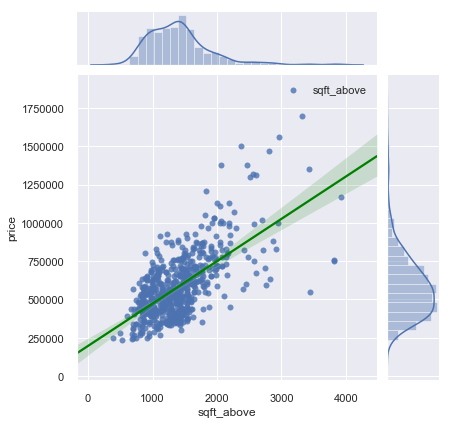

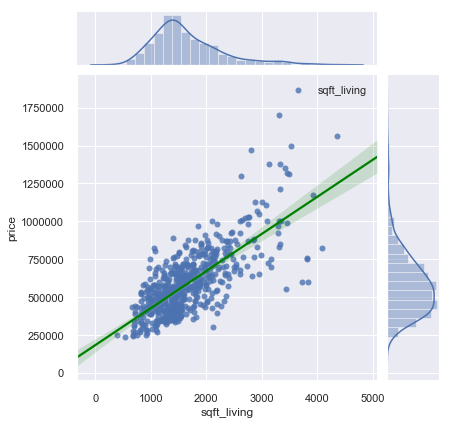

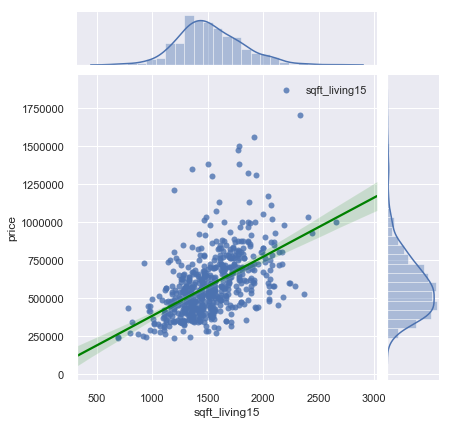

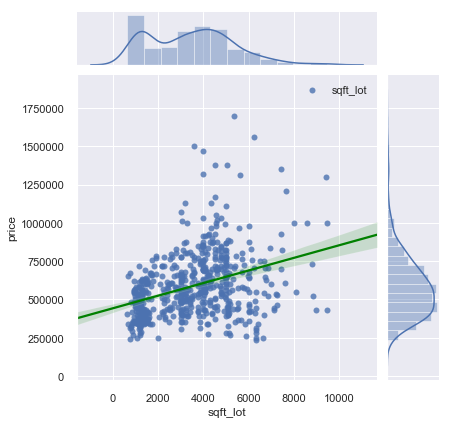

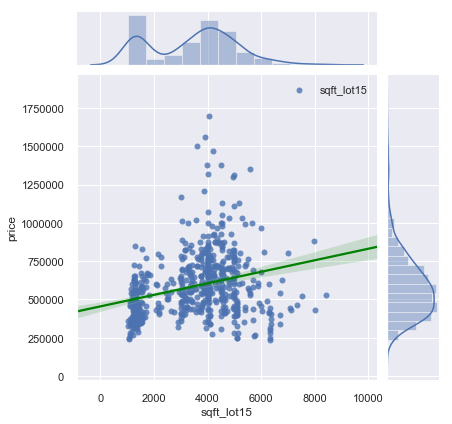

In [12]:
for column in ['lat',
               'long', 'price', "sqft_above", 'sqft_living',
              "sqft_living15", "sqft_lot", "sqft_lot15",
              ]:
    sns.jointplot(x=column, y="price",
                 data=kc,
                 kind="reg",
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()


Scrub

In [13]:
# drop duplicated ID keep older most recent listing
kc['id'].drop_duplicates(keep='last',inplace=True)

In [14]:
# convert the date column into datetime datatyper
kc['date'] = pd.to_datetime(kc['date'])
kc['date'].head(2)

17    2014-05-29
111   2015-03-04
Name: date, dtype: datetime64[ns]

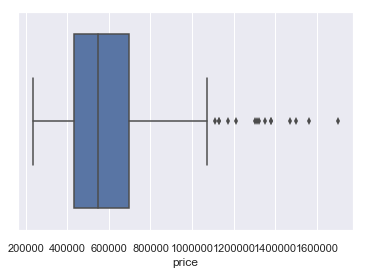

In [15]:
sns.boxplot(kc['price']);

In [16]:
kc['price'] = np.log10(kc['price'])

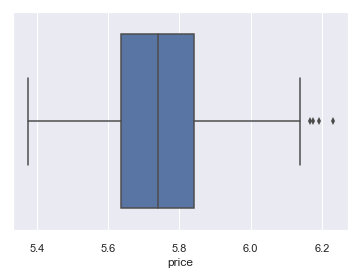

In [17]:
sns.boxplot(kc['price']);

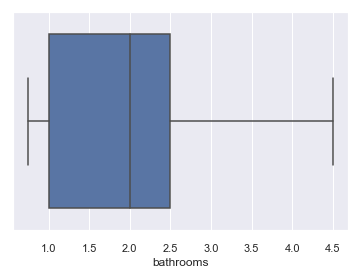

In [18]:
# deal with bathrooms and bedrooms outliers first
sns.boxplot(kc['bathrooms']);

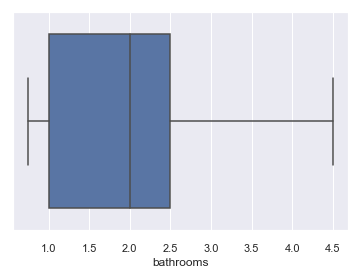

In [19]:
sns.boxplot(kc['bathrooms']);

In [20]:
# eliminate rows with outlier categorical data based upon IQR
kc= kc[(kc['bathrooms'] <= 3.5) & (kc['bathrooms'] >=0.75)]

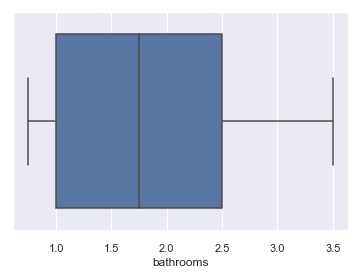

In [21]:
sns.boxplot(kc['bathrooms']);

In [22]:
#normalize the data using mean
kc["bathrooms"] = (kc["bathrooms"]- kc["bathrooms"].mean()) / kc["bathrooms"].std()

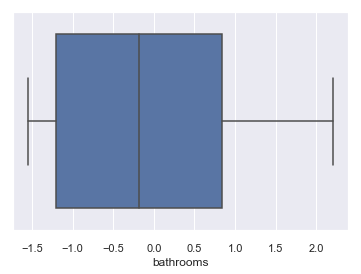

In [23]:
sns.boxplot(kc["bathrooms"]);

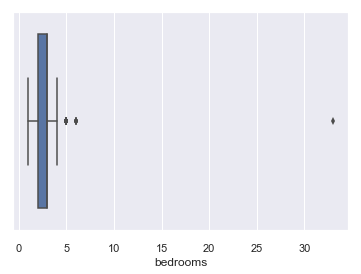

In [24]:
sns.boxplot(kc['bedrooms']);

In [25]:
# eliminate rows with outlier categorical data based upon IQR
kc= kc[(kc['bedrooms'] <= 4)]

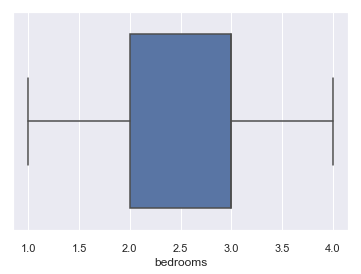

In [26]:
sns.boxplot(kc['bedrooms']);

In [27]:
#normalize the data
kc["bedrooms"] = (kc["bedrooms"]- kc["bedrooms"].mean()) / kc["bedrooms"].std()

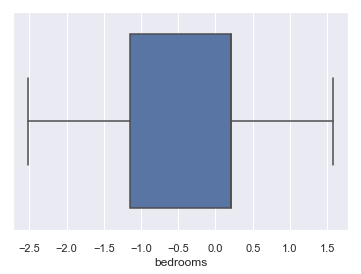

In [28]:
sns.boxplot(kc['bedrooms']);

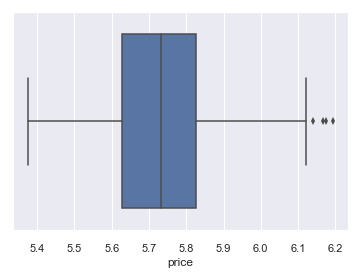

In [29]:
# a little bit better for price!
sns.boxplot(kc['price']);

In [30]:
kc['sqft_basement'].value_counts().head(3)

0.0      339
?         13
200.0     10
Name: sqft_basement, dtype: int64

So, the square footage of a house should not include the square footage of the basement.  It may be possible to figure out the value of some of these placeholders by using the difference of sqft_living and sqft_above.

In [31]:

kc.loc[kc['sqft_basement'] == '?',['sqft_living','sqft_above']]

,sqft_living,sqft_above
1558,2130,1650
2662,2500,1460
4618,1610,910
4830,1350,1350
5015,2160,2160
6631,870,800
7325,1100,840
7620,980,980
11463,1540,1540
11806,1680,1680


In [32]:
# I should be able to fix 5 columns in this dataset...probably more in main dataset
kc.loc[(kc["sqft_basement"] == '?') & (kc["sqft_above"]!=kc['sqft_living'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1558,1972201820,2014-10-16,5.785330,1.575557,0.158974,2130,2620,1.5,0.0,0.0,...,7,1650,?,1919,NaN,98103,47.6515,-122.346,1330,2719
2662,2402100055,2014-07-16,5.826075,1.575557,1.521274,2500,5000,1.5,0.0,0.0,...,7,1460,?,1926,0.0,98103,47.6895,-122.331,1720,4500
4618,9136102680,2014-09-23,5.796921,0.212847,-0.181601,1610,3210,1.0,0.0,0.0,...,7,910,?,1928,0.0,98103,47.6656,-122.335,1420,3210
6631,3126049439,2015-01-09,5.495544,-1.149863,-0.522176,870,747,2.0,0.0,0.0,...,8,800,?,2004,NaN,98103,47.6967,-122.342,1710,1280
7325,4310700020,2014-10-10,5.447158,0.212847,-1.203326,1100,5132,1.0,NaN,0.0,...,6,840,?,1948,NaN,98103,47.7011,-122.336,1280,5132


In [33]:
#Replace ? with difference between sqft_above and sqft_living

kc['sqft_basement'].replace(to_replace='?', value = abs(kc['sqft_above']-kc['sqft_living']), inplace=True)
kc['sqft_basement'].value_counts().head()

0.0      339
400.0     10
200.0     10
0          8
500.0      7
Name: sqft_basement, dtype: int64

In [34]:
kc['sqft_basement'].isna().sum()

0

In [35]:
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'], errors="coerce")

In [36]:
kc['sqft_basement'].value_counts()

0.0       347
400.0      10
200.0      10
500.0       7
700.0       7
600.0       7
800.0       7
900.0       6
450.0       4
220.0       4
1060.0      4
760.0       4
300.0       4
100.0       4
430.0       4
820.0       3
880.0       3
460.0       3
240.0       3
140.0       3
790.0       3
480.0       3
150.0       3
120.0       3
690.0       2
970.0       2
830.0       2
730.0       2
560.0       2
610.0       2
         ... 
1160.0      1
250.0       1
1190.0      1
260.0       1
670.0       1
530.0       1
650.0       1
1140.0      1
780.0       1
518.0       1
890.0       1
1500.0      1
620.0       1
50.0        1
20.0        1
190.0       1
40.0        1
170.0       1
640.0       1
130.0       1
172.0       1
590.0       1
280.0       1
110.0       1
380.0       1
1120.0      1
80.0        1
370.0       1
340.0       1
630.0       1
Name: sqft_basement, Length: 100, dtype: int64

In [37]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
kc = kc.drop(["waterfront", "sqft_living",
             "lat", "long", "view","sqft_living15",
             "sqft_lot15","id","yr_renovated",
             "zipcode"], axis=1)


In [39]:
kc.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
dtype: int64

In [40]:
kc.head(2)

,date,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
17,2014-05-29,5.685742,1.575557,-1.203326,4300,1.5,4,7,1600,0.0,1916
111,2015-03-04,5.755875,0.212847,-0.181601,3328,1.0,5,6,700,560.0,1905


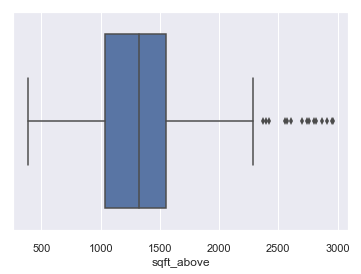

In [41]:
sns.boxplot(kc["sqft_above"])

Skewness =  0.9913191818908088
Kurtosis =  1.7994533112264772


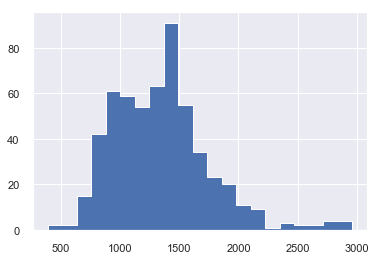

In [42]:
plt.hist(kc['sqft_above'], bins='auto', histtype='stepfilled')
print('Skewness = ', skew(kc['sqft_above']))
print('Kurtosis = ', kurtosis(kc['sqft_above']))

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


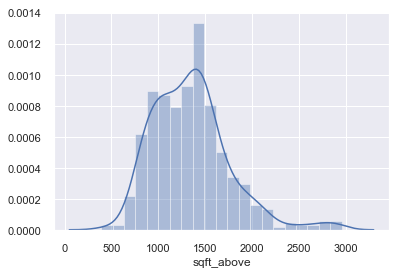

In [43]:
sns.distplot(kc['sqft_above'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


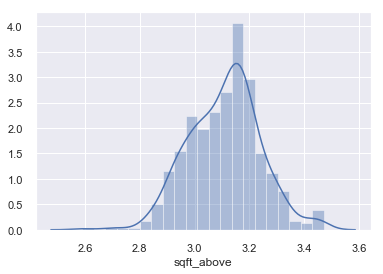

In [44]:

sns.distplot(np.log10(kc['sqft_above']))

In [45]:
kc['sqft_above'] = np.log10(kc['sqft_above'])

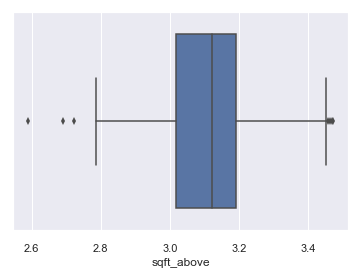

In [46]:
sns.boxplot(kc["sqft_above"])

Skewness =  -0.06896155703740309
Kurtosis =  0.3551257080304935


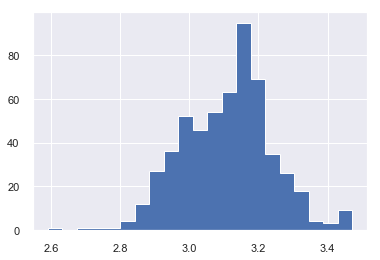

In [47]:
plt.hist(kc['sqft_above'], bins='auto', histtype='stepfilled')
print('Skewness = ', skew(kc['sqft_above']))
print('Kurtosis = ', kurtosis(kc['sqft_above']))

In [48]:
kc['sqft_basement'].isna().sum()

0

I'm still getting error messages with sqft_basement showing NaN even though the above value is 0

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


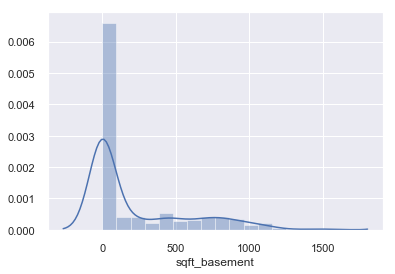

In [49]:
sns.distplot(kc['sqft_basement'])

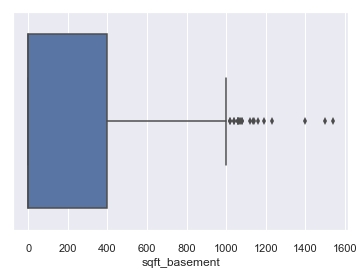

In [50]:
sns.boxplot(kc["sqft_basement"])

Skewness =  1.414277934341743
Kurtosis =  0.8449004293862643


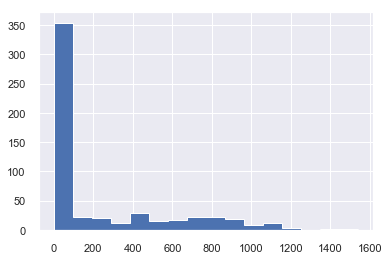

In [51]:
plt.hist(kc['sqft_basement'], bins='auto', histtype='stepfilled')
print('Skewness = ', skew(kc['sqft_basement']))
print('Kurtosis = ', kurtosis(kc['sqft_basement']))

In [55]:
#normalize the data
kc["sqft_basement"] = (kc["sqft_basement"]- kc["sqft_basement"].mean()) / kc["sqft_basement"].std()

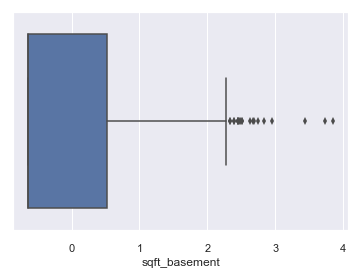

In [56]:
sns.boxplot(kc["sqft_basement"])

In [61]:
kc['sqft_basement'].value_counts()

-0.633910    347
 0.529257     10
-0.052327     10
 1.401632      7
 0.820048      7
 1.692424      7
 1.110840      7
 1.983216      6
 0.616494      4
 0.674652      4
 1.576107      4
-0.343119      4
 2.448482      4
 0.005831      4
 0.238465      4
 1.663345      3
-0.226802      3
-0.284960      3
 1.750582      3
 0.063990      3
 0.703732      3
 1.925057      3
-0.197723      3
 0.761890      3
 1.285315      2
 1.430711      2
-0.430356      2
 0.645573      2
 2.128611      2
 2.041374      2
            ... 
 1.314394      1
 2.826512      1
 2.942828      1
-0.168644      1
-0.575752      1
-0.255881      1
 2.666576      1
 1.198078      1
 0.209386      1
 3.437174      1
 0.631034      1
 0.180306      1
 0.558336      1
-0.139565      1
 0.471098      1
-0.133749      1
 0.267544      1
-0.401277      1
 0.965444      1
 2.157691      1
 3.727966      1
 1.168998      1
 0.093069      1
-0.218078      1
-0.314040      1
 2.070453      1
-0.517594      1
 1.256236     

In [62]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(kc[['sqft_above', 'sqft_lot', 'sqft_basement']])
df_std = std_scale.transform(kc[['sqft_above', 'sqft_lot', 'sqft_basement']])

minmax_scale = preprocessing.MinMaxScaler().fit(kc[['sqft_above', 'sqft_lot', 'sqft_basement']])
df_minmax = minmax_scale.transform(kc[['sqft_above', 'sqft_lot', 'sqft_basement']])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


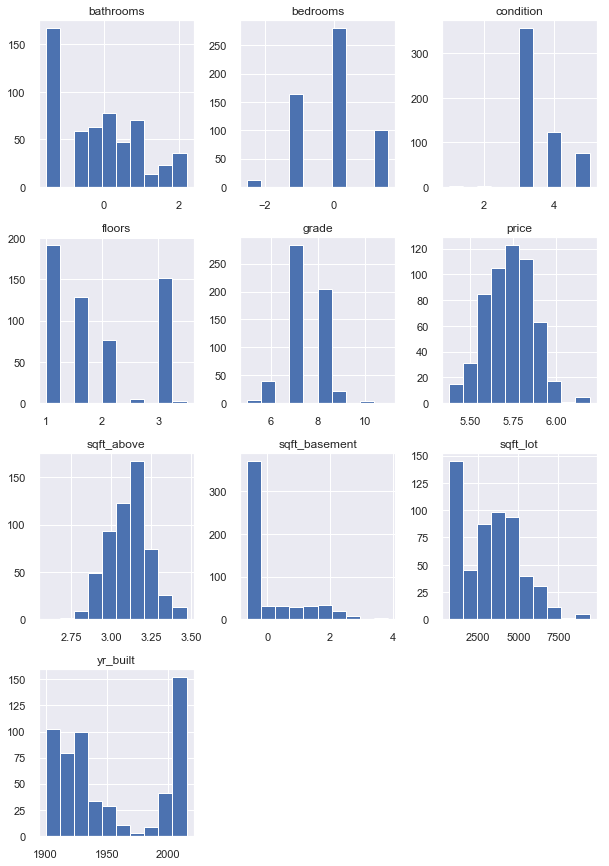

In [63]:
kc.hist(figsize=(10,15));

In [56]:
kc.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_lot         False
floors           False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
dtype: bool

In [57]:
y = kc["price"]
X = kc.loc[:,"bedrooms":"yr_built"]

In [58]:
y.shape, X.shape

((557,), (557, 9))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, y_train.shape

((417, 9), (417,))

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.6903060467826689

In [ ]:
# check for multicolinearity
correlation = kc.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")

In [ ]:
kc['bedrooms']= kc['bedrooms'].astype('category')

In [ ]:
kc['bathrooms']= kc['bathrooms'].astype('category')

In [ ]:
kc['floors']= kc['floors'].astype('category')

In [ ]:
kc['condition']= kc['condition'].astype('category')

In [ ]:
kc['grade']= kc['grade'].astype('category')

In [ ]:
kc['yr_built']= kc['yr_built'].astype('category')

In [ ]:
kc['zipcode']= kc['zipcode'].astype('category')

In [ ]:
bath_dummies = pd.get_dummies(kc["bathrooms"], prefix="bath")

In [ ]:
bedroom_dummies = pd.get_dummies(kc["bedrooms"], prefix="bed")

In [ ]:
floor_dummies= pd.get_dummies(kc["floors"], prefix="flr")

In [ ]:
condition_dummies = pd.get_dummies(kc["condition"], prefix="con")

In [ ]:
grade_dummies= pd.get_dummies(kc["grade"], prefix="grd")

In [ ]:
yr_built_dummies= pd.get_dummies(kc['yr_built'], prefix="yr")

In [ ]:
zipcode_dummies= pd.get_dummies(kc['zipcode'], prefix="zip")

In [ ]:
kc = kc.drop([
    "bathrooms","bedrooms","floors",
    'condition','grade', 'yr_built', "zipcode"],
    axis=1)

In [ ]:
kc = pd.concat([kc, bath_dummies, bedroom_dummies, floor_dummies, condition_dummies, grade_dummies, zipcode_dummies, yr_built_dummies], axis=1)

In [ ]:
kc.describe()

In [ ]:
kc.info()

In [ ]:
kc.dtypes

In [ ]:
kc.isna().sum()

In [ ]:
import statsmodels.api as sm

In [ ]:
kc.describe().columns.drop(['price'])
Index(['date', 'sqft_above', 'sqft_basement'], dtype='object')


In [ ]:
col_names = kc.describe().columns.drop(['Weekly_Sales'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("kc: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=kc).fit()
    X_new = pd.DataFrame({val: [kc[val].min(), kc[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

In [ ]:
This cell will break the run all if I reset the kernel

In [ ]:
# Load the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew

import and read file:

In [ ]:
kc = pd.read_csv('kc_house_data.csv', 'r', delimiter=',')

#Checking that the import was successful.
kc.head()

** Take an initial glance at what we are going to 
be dealing with.**

In [ ]:
kc.tail()

In [ ]:
kc.sample(20)

In [ ]:
kc.info()

In [ ]:
np.round(kc.describe())

### Explore Table’s Dimension and Data Types
First we will look at the dimension, this will be useful to refer back to later on while cleaning the data.

In [ ]:
kc.shape

We can see that the data frame has 21 columns and  21,597 rows/entries. Now we will look at the data types.

In [ ]:
kc.dtypes

**Take note of the columns we will need to explore further because they are more than likely the wrong data type.**
* 1. Date is object should probably be datetime.
* 2. Waterfront should be Boolean
* 3. I'm not sure about view, I was expecting object
* 4. yr_renovated and floors should be whole numbers but float64 will get the job done, not worth messing with.

##### Google around to figure out what each column is, I found the original dataset and description Kaggle.

- **id** a notation for a house<br>
- **date** Date house was sold<br>
- **price** Price house was sold for<br>
- **bedrooms** Number of Bedrooms/House<br>
- **bathrooms** Number of bathrooms/House<br>
- **sqft_living** square footage of the home<br>
- **sqft_lot** square footage of the lot<br>
- **floors** Total floors (levels) in house<br>
- **waterfront** House which has a view to a waterfront<br>
- **view** Has been viewed<br>
- **condition** How good the condition is ( Overall )<br>
- **grade** overall grade given to the housing unit, based on King County grading system<br>
- **sqft_above** square footage of house apart from basement<br>
- **sqft_basement** square footage of the basement<br>
- **yr_built** Built Year<br>
- **yr_renovated** Year when house was renovated<br>
- **zipcode** zipcode<br>
- **lat** Latitude coordinate<br>
- **long** Longitude coordinate<br>
- **sqft_living15** average living space of nearest 15 neighbors<br>
- **sqft_lot15** average lot size of nearest 15 neighbors<br>

**Pause and think**
1. I can use sqft_living and sqft_lot15 to determine if a house is larger or smaller than those around it.<br>


2. I can use lat and long to map display house on map.<br>


3. Price is asking price not what the houses actually sold for.  Meaning all of this data is likely taken from real estate listings, meaning that soft data like condition and grade are likely to be embellished.<br>


4. An id may be listed more than once if the same house was listed more than once within the timeframe of this dataset.  Implications should be explored further if duplicates exist.<br>

### Found a useful glossary of terms when dealing with Kings County Residential Properties
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g

#### Deal with Null values: View, Delete and Impute
### How many rows and columns have null values?

In [ ]:
# For each column, are there any NaN values?
kc.isnull().any()

waterfront, view, and yr_renovated all have NaN values.  Remember that waterfront's data type needs changed and I can potentially determine if there should be a yr_renovated by referencing sqft_living15 and sqft_lot15.  There may be more "place holders" I need to deal with, but this is a start.  

In [ ]:
# for each column, how many rows are NaN?
kc.isnull().sum()

### Now that I have an overview to reference back to, I will systematically analyze and clean each column.
I am going to normalize data and be more aggressive with my editing later on, since this is my first project I'd like to have a starting point I can easily refer back to.

**1. id** A notation for a house.


In [ ]:
# the id, should be unique for each house.
kc.id.duplicated().sum()

177 ID's appear more than once.  I want to pull these for further analysis.

In [ ]:
duplicated_id = pd.concat(g for _, g in kc.groupby("id") if len(g) > 1)
# repeated house ID's
duplicated_id

353 rows are placed into a separate dataframe because this is worth exploring further, possibly one of my three required questions.  And I'm moving on to the next column before getting sidetracked.  Also, this dataframe will need to undergo the same cleaning as the main kc, dataframe to deal with the other rows.   

**2. date**- Date house was sold <br>

I already know that I need to change the object type to datetime from when I checked each columns dtype.  

In [ ]:
kc['date'].dtype

In [ ]:
kc['date'] = pd.to_datetime(kc['date'])
kc['date'].head()

Great! The data type has been successfully changed to datetime in the format of yyyy-mm-dd.

In [ ]:
# earliest date recorded
kc['date'].min()

In [ ]:
# latest date recorded
kc['date'].max()

In [ ]:
# range of dates
kc['date'].max() - kc['date'].min()

This entire dataset deals with houses on the market between May 2, 2014 - May 27, 2015.  A span of 390 days.  

**3. price** 

In [ ]:
kc['price'].head()

In [ ]:
kc['price'].describe()

In [ ]:
kc['price'].head()

In [ ]:
kc['price'].tail()

In [ ]:
kc['price'].sample(5)

In [ ]:
# The lowest asking price of a home
kc['price'].min()

In [ ]:
# The highest asking price of a home
kc['price'].max()

In [ ]:
kc['price'].quantile([0.25,0.5,0.75])

In [ ]:
kc['price'].plot(kind='box');

To Do: Get rid of outliers and use log10 to make the prices easier to read. I choose log10 when dealing with currency because it is a base 10 system.

In [ ]:
np.log10(kc['price']).plot(kind='box');

In [ ]:
# get z-score and assign it to variable for later use
z_price = np.abs(stats.zscore(kc['price']))
print(z_price)

In [ ]:
plt.hist(kc['price'], bins='auto', histtype='step')
print('Skewness = ', skew(kc['price']))
print('Kurtosis = ', kurtosis(kc['price']))

There are so many outliers that I would be interested in breaking this dataset apart rather than just filtering out the outliers.  I also have an idea that the things people look for in a 'normal' house are completely different than the 'elite' housing market. 

**4. bedrooms**- number of bedrooms

In [ ]:
kc['bedrooms'].sample(10)

In [ ]:
# The least number of bedrooms
kc['bedrooms'].min()

In [ ]:
# The most number of bedrooms
kc['bedrooms'].max()

In [ ]:
kc['bedrooms'].quantile([0.25,0.5,0.75])

In [ ]:
kc['bedrooms'].plot(kind='box');

In [ ]:
kc['bedrooms'].value_counts()

In [ ]:
fig, ax = plt.subplots()
kc['bedrooms'].value_counts().plot(ax=ax, kind='barh');

In [ ]:
# get z-score and assign it to variable for later use
z_bedrooms = np.abs(stats.zscore(kc['bedrooms']))
print(z_bedrooms)

In [ ]:
plt.hist(kc['bedrooms'], bins=[0,1,2,3,4,5,6,7,8,9,33])
print('Skewness = ', skew(kc['bedrooms']))
print('Kurtosis = ', kurtosis(kc['bedrooms']))

**5. bathrooms**- number of bathrooms

In [ ]:
kc['bathrooms'].sample(10)

I'm not sure what a 1/4 or 3/4 bathroom is, will need to look into this further.

In [ ]:
kc['bathrooms'].min()

In [ ]:
kc['bathrooms'].max()

In [ ]:
kc['bathrooms'].quantile([0.25,0.5,0.75])

In [ ]:
kc['bathrooms'].plot(kind='box');

In [ ]:
kc['bathrooms'].describe()

In [ ]:
kc['bathrooms'].unique()

In [ ]:
# get z-score and assign it to variable for later use
z_bathrooms = np.abs(stats.zscore(kc['bathrooms']))
print(z_bathrooms)

In [ ]:
plt.hist(kc['bathrooms'], bins='auto')
print('Skewness = ', skew(kc['bathrooms']))
print('Kurtosis = ', kurtosis(kc['bathrooms']))

In [ ]:
sns.distplot(kc['bathrooms'])

**6. sqft_living**

In [ ]:
kc['sqft_living'].sample(10)

In [ ]:
#smallest house 370 sqft
# Largest house is 13,540 square feet
kc['sqft_living'].describe()

In [ ]:
# median sqft is 1,910
kc['sqft_living'].median()

In [ ]:
kc['sqft_living'].plot(kind='box');

In [ ]:
kc['sqft_living'].var()

In [ ]:
# get z-score and assign it to variable for later use
z_living = np.abs(stats.zscore(kc['sqft_living']))
print(z_living)

In [ ]:
plt.hist(kc['sqft_living'], bins='auto')
print('Skewness = ', skew(kc['sqft_living']))
print('Kurtosis = ', kurtosis(kc['sqft_living']))

In [ ]:
sns.distplot(kc['sqft_living'])

**7. sqft_lot**

In [ ]:
kc['sqft_lot'].sample(10)

In [ ]:
np.round(kc['sqft_lot'].describe())

In [ ]:
kc['sqft_lot'].unique()

In [ ]:
kc['sqft_lot'].quantile([0.25,0.5,0.75])

In [ ]:
#wow, huge spread
np.round(kc['sqft_lot'].var(),2)

1.7 Bil Sq feet is a huge variance.  I'm not even sure what that would look like.
- 1 acre = 43560 sqft
- 1,715,006492.98 sqft = 39371.13 acres
- 61.5 Square Miles

In [ ]:
# lots of outliers this will need cleaned up
np.log(kc['sqft_lot']).plot(kind='box');

In [ ]:
# get z-score and assign it to variable for later use
z_lot = np.abs(stats.zscore(kc['sqft_lot']))
print(z_lot)

In [ ]:
plt.hist(kc['sqft_lot'], bins='auto')
print('Skewness = ', skew(kc['sqft_lot']))
print('Kurtosis = ', kurtosis(kc['sqft_lot']))

In [ ]:
sns.distplot(kc['sqft_lot'], fit=tight)

**8. floors**

In [ ]:
kc['floors'].sample(10)

In [ ]:
#what's a half, floor??
kc['floors'].unique()

In [ ]:
kc['floors'].mode()

In [ ]:
kc['floors'].plot(kind='box')

In [ ]:
# get z-score and assign it to variable for later use
z_floors = np.abs(stats.zscore(kc['floors']))
print(z_floors)

In [ ]:
plt.hist(kc['floors'], bins='auto')
print('Skewness = ', skew(kc['floors']))
print('Kurtosis = ', kurtosis(kc['floors']))

In [ ]:
sns.distplot(kc['floors'])

**9. waterfront**

In [ ]:
kc['waterfront'].sample(10)

In [ ]:
kc['waterfront'].unique()

In [ ]:
kc['waterfront'].isnull().sum()

In [ ]:
kc['waterfront'].value_counts()

In [ ]:
# most properties are not waterfront, these are 
#realestate listings so waterfront would be listed more than likely
#nan is probably no
kc['waterfront'].fillna(0, inplace=True)

In [ ]:
kc['waterfront'].isnull().sum()

In [ ]:
# Change datatype to Boolean 0 is no, 1 is yes.
kc['waterfront'] = kc['waterfront'].astype('bool')

In [ ]:
kc['waterfront'].dtype

In [ ]:
#split the data frame on Boolean values
#create a waterfront database
waterfront = kc[kc['waterfront'] == True]

In [ ]:
waterfront['waterfront'].value_counts()

In [ ]:
#why is waterfront now int64 above but boolean here?
waterfront['waterfront'].dtypes

In [ ]:
no_water = kc[kc['waterfront'] == False]

In [ ]:
no_water['waterfront'].value_counts()

**10. view**

In [ ]:
kc['view'].dtypes

In [ ]:
kc['view'].unique()

In [ ]:
kc['view'].isnull().sum()

In [ ]:
kc['view'].value_counts()

In [ ]:
# there are only 63 null views there are already
# over 19,000 views = 0

kc['view'].fillna(0, inplace=True)

In [ ]:
kc['view'].isnull().sum()

In [ ]:
# get z-score and assign it to variable for later use
z_views = np.abs(stats.zscore(kc['view']))
print(z_views)

In [ ]:
plt.hist(kc['view'])
print('Skewness = ', skew(kc['view']))
print('Kurtosis = ', kurtosis(kc['view']))

**11. condition**
**detailed description of category from Kings County Website**<br>

Relative to age and grade. Coded 1-5.<br>

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.<br>

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.<br>

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.<br>

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.<br>

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. <br>


In [ ]:
kc['condition'].unique()

In [ ]:
np.round(kc['condition'].describe())

In [ ]:
sns.distplot(
    kc['condition']);

In [ ]:
# get z-score and assign it to variable for later use
z_condition = np.abs(stats.zscore(kc['condition']))
print(z_condition)

In [ ]:
plt.hist(kc['bathrooms'], bins='auto')
print('Skewness = ', skew(kc['bathrooms']))
print('Kurtosis = ', kurtosis(kc['bathrooms']))

**12. grade**
**detailed description of category from Kings County Website**

**GRADE** Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.) <br>

**From Area Report for Residential Buildings**<br>
1 = Cabin<br>
2 = Substandard<br>
3 = Poor<br>
4 = Low<br>
5 = Fair<br>
6 = Low Average<br>
7 = Average<br>
8 = Good<br>
9 = Better<br>
10 = Very Good<br>
11 = Excellent<br>
12 = Luxury<br>
13 = Mansion<br>

In [ ]:
kc['grade'].describe()

In [ ]:
kc['grade'].value_counts()

In [ ]:
kc['grade'].plot(kind='box');

In [ ]:
# get z-score and assign it to variable for later use
z_grade = np.abs(stats.zscore(kc['grade']))
print(z_grade)

**13. sqft_above**

In [ ]:
np.round(kc['sqft_above'].describe(),2)

In [ ]:
kc['sqft_above'].plot(kind='box');

In [ ]:
# get z-score and assign it to variable for later use
z_sqft_above = np.abs(stats.zscore(kc['sqft_above']))
print(z_sqft_above)

**14. yr_built**

In [ ]:
np.round(kc['yr_built'].describe(),2)

In [ ]:
kc['yr_built'].plot(kind='density',);

In [ ]:
# get z-score and assign it to variable for later use
z_yr_built = np.abs(stats.zscore(kc['yr_built']))
print(z_yr_built)

In [ ]:
sns.distplot(kc['yr_built'])

**15. yr_renovated**- should be datetime but will keep as is until making questions

In [ ]:
kc['yr_renovated'].isnull().sum()

In [ ]:
kc['yr_renovated'].unique()

In [ ]:
kc['yr_renovated'].value_counts()

In [ ]:
# 3,842 houses have no data showing renovation with NaN
# 17,011 houses have no data showing renovation with value == 0
# combine these 2 for now
kc['yr_renovated'].fillna(0,inplace=True)

In [ ]:
# put renovated houses into their own seperate dataframe
# these are dates so I should convert them to datetime object


In [ ]:
# get z-score and assign it to variable for later use
z_yr_renovated = np.abs(stats.zscore(kc['yr_renovated']))
print(z_yr_renovated)

**16. zipcode**

In [ ]:
kc['zipcode'].value_counts()

**17. lat**- latitude<br>
I'm not used to dealing with Lat and Long as a Decimal place; therefore I'm including the formula in case I need to reference it later.<br>

Formula: Decimal Degrees = (Degrees/1) + (Minutes/60) + (Seconds/3600)


In [ ]:
kc['lat'].head()

**18. long** -Longitude

In [ ]:
kc['long'].sample()

I can map the coordinates with the lat and long.

**19. sqft_living**
an average of the 15 nearest houses sqft_living size

In [ ]:
kc['sqft_living15'].head()

In [ ]:
np.round(kc['sqft_living15'].describe(),2)

In [ ]:
kc['sqft_living15'].quantile([0.25,0.5,0.75])

In [ ]:
kc['sqft_living15'].plot(kind='box')

In [ ]:
# looking for placeholders
kc['sqft_living15'].unique()

In [ ]:
# get z-score and assign it to variable for later use
z_sqft_living15 = np.abs(stats.zscore(kc['sqft_living15']))
print(z_sqft_living15)

**20. sqft_lot15**

In [ ]:
kc['sqft_lot15'].unique()

In [ ]:
np.round(kc['sqft_lot15'].describe(),2)

In [ ]:
np.round(kc['sqft_lot15'].var(),2)

In [ ]:
# get z-score and assign it to variable for later use
z_sqft_lot15 = np.abs(stats.zscore(kc['sqft_lot15']))
print(z_sqft_lot15)

### Now that the data is cleaned up a bit (before dealing with outliers) I'm going to look at correlations and start to formulate some questions and directions for the project.

In [ ]:
import seaborn as sns

In [ ]:
correlation = kc.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [ ]:
kc.corr()['price'].sort_values(ascending=False)

Initial thoughts, and of course this is before cleaning the data completely, the square footage of livable space seems to have the greatest influence on space, and some of these values are just cluttering up space on heatmap and making it more difficult to read, such as coordinate values. I need to remove outliers and remove variables that are not relevant. 

In [ ]:
# I'm filtering out all the columns that show less of a correlation 
# with price first just so it's easier for me to look at.
non_norm_df = kc[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'floors', 'waterfront', 'view', 'grade', 'sqft_above']]

In [ ]:
correlation = non_norm_df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap='viridis')

**Thoughts**<br>
   First off, I like that color selection better.  Secondly it looks like the largest factor in price seems to be square footage.  This is what I already suspected so it's good to see the evidence.  The first thing people ask when they come to see a property, before they even decide if its worth the effort of viewing is the square footage.  If you look at a NYC realestate website you'll notice a lot of properties do not have the square footage listed.  This is so that you will be forced to inquire and the realator has the oppurtunity to try and sell you on the idea that the square footage is more usable in their property than other larger properties. But, people don't really care, they want square footage even if it's all hallways.  

Grade seems to be the second most important variable in determining price (sqft_above is likely very similar to sqft_living considering how many of the homes only have 1 floor and no basement)

### The 3 questions
#### 1.  What are the most important qualities of a listing in determining price.
#### 2.  Which houses are 

In [ ]:
kc['price'] = kc['price'][(z_price<3).all()]

In [ ]:
# place the houses that show up more than once into a separate dataframe
kc["is_duplicated"] = kc['id'].duplicated(False)

In [ ]:
kc['is_duplicated']

In [ ]:
from mpl_toolkits.basemap import Basemap